#                                          TP2: Apprentissage supervisé

## I.Apprentissage supervisé: Feature engineering et classification

### 1.Chargement des données et préparation

#### Charger les données

In [3]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

#### Transformer les données

In [102]:
data = pd.read_csv('./credit_scoring.csv', sep=';')
X = data.values

In [103]:
print("data : ", data)
print("X : ", X)

data :        Seniority  Home  Time   Age  Marital  Records  Job  Expenses  Income  \
0           9.0   1.0  60.0  30.0      0.0      1.0  1.0      73.0   129.0   
1          17.0   1.0  60.0  58.0      1.0      1.0  0.0      48.0   131.0   
2          10.0   0.0  36.0  46.0      0.0      2.0  1.0      90.0   200.0   
3           0.0   1.0  60.0  24.0      1.0      1.0  0.0      63.0   182.0   
4           0.0   1.0  36.0  26.0      1.0      1.0  0.0      46.0   107.0   
...         ...   ...   ...   ...      ...      ...  ...       ...     ...   
4370        1.0   1.0  60.0  39.0      0.0      1.0  0.0      69.0    92.0   
4371       22.0   0.0  60.0  46.0      0.0      1.0  0.0      60.0    75.0   
4372        0.0   0.0  24.0  37.0      0.0      1.0  1.0      60.0    90.0   
4373        0.0   1.0  48.0  23.0      1.0      1.0  1.0      49.0   140.0   
4374        5.0   0.0  60.0  32.0      0.0      1.0  1.0      60.0   140.0   

      Assets    Debt  Amount   Price  Status  
0       

#### Séparer en 2 tableaux

In [104]:
X_split = [[],[]]
for x in X:
    if x[13] == 0 :
        X_split[0].append(x)
    else :
        X_split[1].append(x)
X_split[0]=np.array(X_split[0])
X_split[1]=np.array(X_split[1])
X_split=np.array(X_split)

In [105]:
print(X_split)

[array([[  10.,    0.,   36., ..., 2000., 2985.,    0.],
        [   0.,    1.,   48., ..., 1200., 1468.,    0.],
        [   0.,    1.,   18., ...,  400.,  500.,    0.],
        ...,
        [   1.,    1.,   48., ..., 1200., 1300.,    0.],
        [   1.,    1.,   60., ...,  900., 1020.,    0.],
        [   0.,    0.,   24., ...,  500.,  963.,    0.]])
 array([[   9.,    1.,   60., ...,  800.,  846.,    1.],
        [  17.,    1.,   60., ..., 1000., 1658.,    1.],
        [   0.,    1.,   60., ...,  900., 1325.,    1.],
        ...,
        [  22.,    0.,   60., ...,  950., 1263.,    1.],
        [   0.,    1.,   48., ...,  550.,  550.,    1.],
        [   5.,    0.,   60., ..., 1350., 1650.,    1.]])]


#### Analyser les données avec print et hist

In [106]:
print(" taille totale : ",X.shape)
print(" pour les 0 : ",X_split[0].shape)
print(" pour les 1 : ",X_split[1].shape)

 taille totale :  (4375, 14)
 pour les 0 :  (1216, 14)
 pour les 1 :  (3159, 14)


(array([[16999.,    16.,     4.,     4.,     1.,     0.,     0.,     0.,
             0.,     0.],
        [44106.,    84.,    18.,    10.,     5.,     0.,     1.,     0.,
             1.,     1.]]),
 array([     0.,  25000.,  50000.,  75000., 100000., 125000., 150000.,
        175000., 200000., 225000., 250000.]),
 <a list of 2 BarContainer objects>)

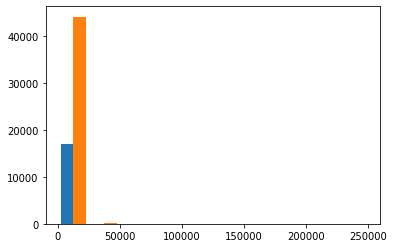

In [107]:
plt.hist(X_split)

In [108]:
labels = data.iloc[:,13].values
X = data.iloc[:,:13].values
print(labels)
print(X)

[1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1
 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1
 0 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1
 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1
 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1
 1 1 0 1 1 0 1 0 0 0 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1
 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 1 1 1 1 1
 0 1 1 1 1 1 0 0 1 1 1 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1
 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 1 1 1 1 1 0 1 1 1 1 0 

#### Séparer les données en 2 parties

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,labels,test_size=0.5, random_state=1)

In [11]:
print(X_test.shape)

print(X_train.shape)

print(Y_test.shape)

print(Y_train.shape)

(2188, 13)
(2187, 13)
(2188,)
(2187,)


### 2) Apprentissage et évaluation des modèles

#### Arbre CART

[[ 325  279]
 [ 318 1266]]
Accuracy: 0.7271480804387569
Recall:  0.7992424242424242
Precision:  0.8194174757281554


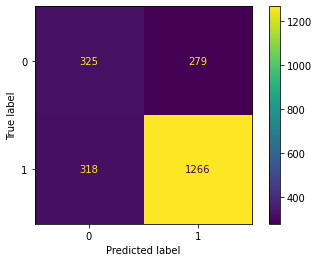

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
classifier = DecisionTreeClassifier(criterion='gini', random_state=1)
classifier = classifier.fit(X_train,Y_train)
Y_pred = classifier.predict(X_test)
print(confusion_matrix(Y_test,Y_pred))
ConfusionMatrixDisplay(confusion_matrix(Y_test,Y_pred)).plot()
acc1Tree = accuracy_score(Y_test, Y_pred)
print("Accuracy:", acc1Tree)
rec1Tree = recall_score(Y_test, Y_pred)
print("Recall: ",rec1Tree)
pre1Tree = precision_score(Y_test, Y_pred)
print("Precision: ",pre1Tree)

#### K plus proches voisins

[[ 189  415]
 [ 187 1397]]
Accuracy: 0.7248628884826326
Recall:  0.8819444444444444
Precision:  0.7709713024282561


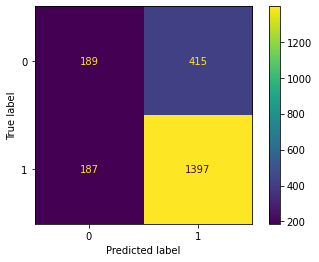

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier = classifier.fit(X_train,Y_train)
Y_pred = classifier.predict(X_test)
print(confusion_matrix(Y_test,Y_pred))
ConfusionMatrixDisplay(confusion_matrix(Y_test,Y_pred)).plot()
acc1KNN = accuracy_score(Y_test, Y_pred)
print("Accuracy:", acc1KNN)
rec1KNN = recall_score(Y_test, Y_pred)
print("Recall: ",rec1KNN)
pre1KNN = precision_score(Y_test, Y_pred)
print("Precision: ",pre1KNN)

#### MultilayerPerceptron

[[ 167  437]
 [ 222 1362]]
Accuracy: 0.6988117001828154
Recall:  0.8598484848484849
Precision:  0.7570872707059477


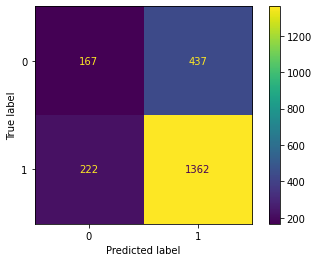

In [14]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
classifier = MLPClassifier(hidden_layer_sizes=(40,20), random_state = 1)
classifier = classifier.fit(X_train,Y_train)
Y_pred = classifier.predict(X_test)
print(confusion_matrix(Y_test,Y_pred))
ConfusionMatrixDisplay(confusion_matrix(Y_test,Y_pred)).plot()
acc1MLP = accuracy_score(Y_test, Y_pred)
print("Accuracy:", acc1MLP)
rec1MLP = recall_score(Y_test, Y_pred)
print("Recall: ",rec1MLP)
pre1MLP = precision_score(Y_test, Y_pred)
print("Precision: ",pre1MLP)

### 3) Normalisation des variables continues

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X = data.values
labels = data.iloc[:,13].values
X = data.iloc[:,:13].values
autoscale = StandardScaler()
X = autoscale.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X,labels,test_size=0.5, random_state=1)

#### Pour l'arbre

[[ 326  278]
 [ 322 1262]]
Accuracy: 0.7257769652650823
Recall:  0.7967171717171717
Precision:  0.8194805194805195
[[0.72714808 0.72577697]
 [0.79924242 0.79671717]
 [0.81941748 0.81948052]]


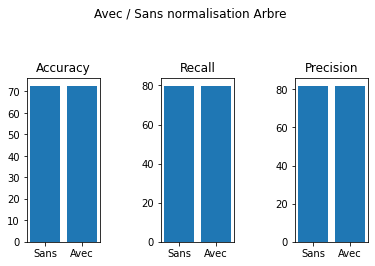

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
classifier = DecisionTreeClassifier(criterion='gini', random_state=1)
classifier = classifier.fit(X_train,Y_train)
Y_pred = classifier.predict(X_test)
print(confusion_matrix(Y_test,Y_pred))
#ConfusionMatrixDisplay(confusion_matrix(Y_test,Y_pred)).plot()
acc2Tree = accuracy_score(Y_test, Y_pred)
print("Accuracy:", acc2Tree)
rec2Tree = recall_score(Y_test, Y_pred)
print("Recall: ",rec2Tree)
pre2Tree = precision_score(Y_test, Y_pred)
print("Precision: ",pre2Tree)

ComparisonArray = np.array([[acc1Tree,acc2Tree],[rec1Tree,rec2Tree],[pre1Tree,pre2Tree]])
print(ComparisonArray)
fig, ax = plt.subplots(1,3)
fig.suptitle('Avec / Sans normalisation Arbre')
fig.tight_layout(pad=3.0)
ax[0].bar(["Sans","Avec"],ComparisonArray[0]*100)
ax[0].title.set_text("Accuracy")
ax[1].bar(["Sans","Avec"],ComparisonArray[1]*100)
ax[1].title.set_text("Recall")
ax[2].bar(["Sans","Avec"],ComparisonArray[2]*100)
ax[2].title.set_text("Precision")

#### Pour le KNN

[[ 282  322]
 [ 216 1368]]
Accuracy: 0.7541133455210237
Recall:  0.8636363636363636
Precision:  0.8094674556213017
[[0.72486289 0.75411335]
 [0.88194444 0.86363636]
 [0.81941748 0.80946746]]


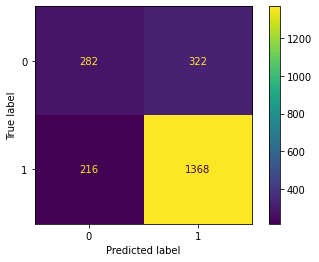

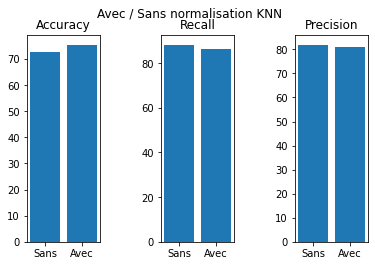

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier = classifier.fit(X_train,Y_train)
Y_pred = classifier.predict(X_test)
print(confusion_matrix(Y_test,Y_pred))
ConfusionMatrixDisplay(confusion_matrix(Y_test,Y_pred)).plot()
acc2KNN = accuracy_score(Y_test, Y_pred)
print("Accuracy:", acc2KNN)
rec2KNN = recall_score(Y_test, Y_pred)
print("Recall: ",rec2KNN)
pre2KNN = precision_score(Y_test, Y_pred)
print("Precision: ",pre2KNN)

ComparisonArray = np.array([[acc1KNN,acc2KNN],[rec1KNN,rec2KNN],[pre1Tree,pre2KNN]])
print(ComparisonArray)
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.tight_layout(pad=3.0)
fig.suptitle('Avec / Sans normalisation KNN')
ax1.bar(["Sans","Avec"],ComparisonArray[0]*100)
ax1.title.set_text("Accuracy")
ax2.bar(["Sans","Avec"],ComparisonArray[1]*100)
ax2.title.set_text("Recall")
ax3.bar(["Sans","Avec"],ComparisonArray[2]*100)
ax3.title.set_text("Precision")

#### Pour le MLP

[[ 334  270]
 [ 225 1359]]
Accuracy: 0.7737659963436929
Recall:  0.8579545454545454
Precision:  0.8342541436464088
[[0.6988117  0.773766  ]
 [0.85984848 0.85795455]
 [0.81941748 0.83425414]]


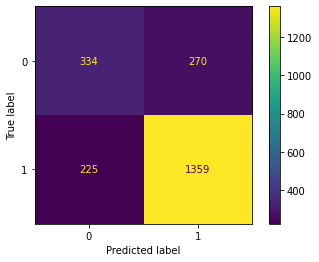

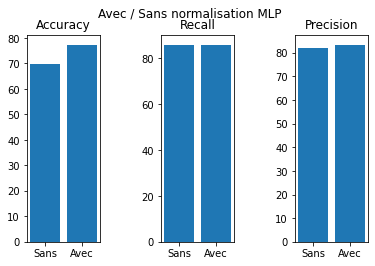

In [18]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
classifier = MLPClassifier(hidden_layer_sizes=(40,20), random_state = 1)
classifier = classifier.fit(X_train,Y_train)
Y_pred = classifier.predict(X_test)
print(confusion_matrix(Y_test,Y_pred))
ConfusionMatrixDisplay(confusion_matrix(Y_test,Y_pred)).plot()
acc2MLP = accuracy_score(Y_test, Y_pred)
print("Accuracy:", acc2MLP)
rec2MLP = recall_score(Y_test, Y_pred)
print("Recall: ",rec2MLP)
pre2MLP = precision_score(Y_test, Y_pred)
print("Precision: ",pre2MLP)

ComparisonArray = np.array([[acc1MLP,acc2MLP],[rec1MLP,rec2MLP],[pre1Tree,pre2MLP]])
print(ComparisonArray)
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.tight_layout(pad=3.0)
fig.suptitle('Avec / Sans normalisation MLP')
ax1.bar(["Sans","Avec"],ComparisonArray[0]*100)
ax1.title.set_text("Accuracy")
ax2.bar(["Sans","Avec"],ComparisonArray[1]*100)
ax2.title.set_text("Recall")
ax3.bar(["Sans","Avec"],ComparisonArray[2]*100)
ax3.title.set_text("Precision")

#### Utilisation du MinMaxScaler

In [19]:

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
X = data.values
labels = data.iloc[:,13].values
X = data.iloc[:,:13].values
autoscale = MinMaxScaler()
X = autoscale.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X,labels,test_size=0.5, random_state=1)

#### Sur les différents sets de données

[[ 325  279]
 [ 313 1271]]
Accuracy: 0.7294332723948812
Recall:  0.80239898989899
Precision:  0.82
[[0.72714808 0.72577697 0.72943327]
 [0.79924242 0.79671717 0.80239899]
 [0.81941748 0.81948052 0.82      ]]


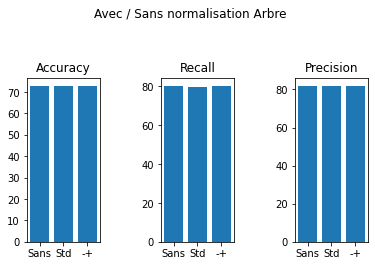

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
classifier = DecisionTreeClassifier(criterion='gini', random_state=1)
classifier = classifier.fit(X_train,Y_train)
Y_pred = classifier.predict(X_test)
print(confusion_matrix(Y_test,Y_pred))
#ConfusionMatrixDisplay(confusion_matrix(Y_test,Y_pred)).plot()
acc3Tree = accuracy_score(Y_test, Y_pred)
print("Accuracy:", acc3Tree)
rec3Tree = recall_score(Y_test, Y_pred)
print("Recall: ",rec3Tree)
pre3Tree = precision_score(Y_test, Y_pred)
print("Precision: ",pre3Tree)

ComparisonArray = np.array([[acc1Tree,acc2Tree,acc3Tree],[rec1Tree,rec2Tree,rec3Tree],[pre1Tree,pre2Tree,pre3Tree]])
print(ComparisonArray)
fig, ax = plt.subplots(1,3)
fig.suptitle('Avec / Sans normalisation Arbre')
fig.tight_layout(pad=3.0)
ax[0].bar(["Sans","Std","-+"],ComparisonArray[0]*100)
ax[0].title.set_text("Accuracy")
ax[1].bar(["Sans","Std","-+"],ComparisonArray[1]*100)
ax[1].title.set_text("Recall")
ax[2].bar(["Sans","Std","-+"],ComparisonArray[2]*100)
ax[2].title.set_text("Precision")

[[ 292  312]
 [ 239 1345]]
Accuracy: 0.7481718464351006
Recall:  0.8491161616161617
Precision:  0.8117079058539529
[[0.72486289 0.75411335 0.74817185]
 [0.88194444 0.86363636 0.84911616]
 [0.81941748 0.80946746 0.81170791]]


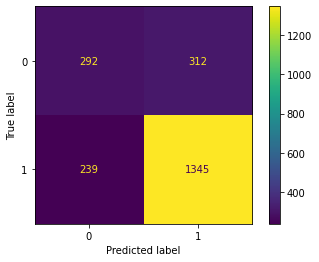

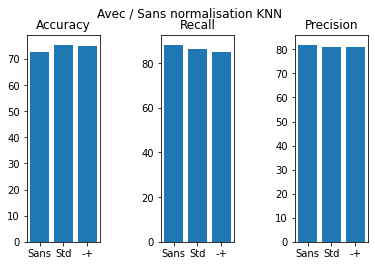

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier = classifier.fit(X_train,Y_train)
Y_pred = classifier.predict(X_test)
print(confusion_matrix(Y_test,Y_pred))
ConfusionMatrixDisplay(confusion_matrix(Y_test,Y_pred)).plot()
acc3KNN = accuracy_score(Y_test, Y_pred)
print("Accuracy:", acc3KNN)
rec3KNN = recall_score(Y_test, Y_pred)
print("Recall: ",rec3KNN)
pre3KNN = precision_score(Y_test, Y_pred)
print("Precision: ",pre3KNN)

ComparisonArray = np.array([[acc1KNN,acc2KNN,acc3KNN],[rec1KNN,rec2KNN,rec3KNN],[pre1Tree,pre2KNN,pre3KNN]])
print(ComparisonArray)
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.tight_layout(pad=3.0)
fig.suptitle('Avec / Sans normalisation KNN')
ax1.bar(["Sans","Std","-+"],ComparisonArray[0]*100)
ax1.title.set_text("Accuracy")
ax2.bar(["Sans","Std","-+"],ComparisonArray[1]*100)
ax2.title.set_text("Recall")
ax3.bar(["Sans","Std","-+"],ComparisonArray[2]*100)
ax3.title.set_text("Precision")

[[ 334  270]
 [ 186 1398]]
Accuracy: 0.7915904936014625
Recall:  0.8825757575757576
Precision:  0.8381294964028777
[[0.6988117  0.773766   0.79159049]
 [0.85984848 0.85795455 0.88257576]
 [0.81941748 0.83425414 0.8381295 ]]


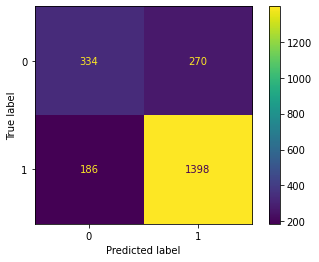

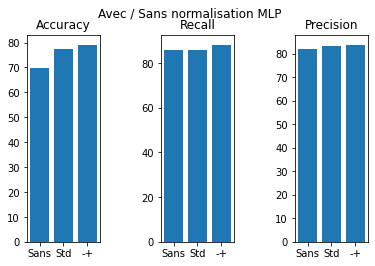

In [22]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
classifier = MLPClassifier(hidden_layer_sizes=(40,20), random_state = 1)
classifier = classifier.fit(X_train,Y_train)
Y_pred = classifier.predict(X_test)
print(confusion_matrix(Y_test,Y_pred))
ConfusionMatrixDisplay(confusion_matrix(Y_test,Y_pred)).plot()
acc3MLP = accuracy_score(Y_test, Y_pred)
print("Accuracy:", acc3MLP)
rec3MLP = recall_score(Y_test, Y_pred)
print("Recall: ",rec3MLP)
pre3MLP = precision_score(Y_test, Y_pred)
print("Precision: ",pre3MLP)

ComparisonArray = np.array([[acc1MLP,acc2MLP,acc3MLP],[rec1MLP,rec2MLP,rec3MLP],[pre1Tree,pre2MLP,pre3MLP]])
print(ComparisonArray)
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.tight_layout(pad=3.0)
fig.suptitle('Avec / Sans normalisation MLP')
ax1.bar(["Sans","Std","-+"],ComparisonArray[0]*100)
ax1.title.set_text("Accuracy")
ax2.bar(["Sans","Std","-+"],ComparisonArray[1]*100)
ax2.title.set_text("Recall")
ax3.bar(["Sans","Std","-+"],ComparisonArray[2]*100)
ax3.title.set_text("Precision")

### 4. Création de nouvelles variables caractéristiques par combinaisons linéaires des variables initiales

In [23]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

#pca=PCA(n_components=3)
#pca.fit(X_train)
#Xtrain_pca=np.concatenate((X_train,pca.transform(X_train)),axis=1)
#Xtest_pca=np.concatenate((X_test,pca.transform(X_test)),axis=1)

#classifieurs(X_train,X_test,Y_train,Y_test)

"""X = data.values
labels = data.iloc[:,13].values
X = data.iloc[:,:13].values
autoscale = MinMaxScaler()
X = autoscale.fit_transform(X)
_nbComponents = 13

pca = PCA(n_components=_nbComponents)
X_pca = pca.fit_transform(X)
X_components = pca.components_[:3]
print([X_components])
print(X.shape)
print(X[0])
X = np.append(X,X_components,axis=0) 
print(X.shape)
#X_train, X_test, Y_train, Y_test = train_test_split(X,labels,test_size=0.5, random_state=1)
"""
#pca=PCA(n_components = 3)
#X_pca=pca.fit_transform(XNorm)

 #sum(pca.explained_variance_ratio_[:2])
    
pca = PCA(n_components = 3)
X_pca = pca.fit_transform(X_train)
Xtrain_pca=np.concatenate((X_train,pca.transform(X_train)),axis=1)
Xtest_pca=np.concatenate((X_test,pca.transform(X_test)),axis=1)
print([X_components])
print(X.shape)

#Reutiliser les classifieurs sur ces données.


NameError: name 'X_components' is not defined

### 5) Sélection de variables

#### Histogramme de l'importance des variables

Index(['Income', 'Seniority', 'Price', 'Amount', 'Age', 'Assets', 'Expenses',
       'Records', 'Time', 'Job', 'Debt', 'Home', 'Marital'],
      dtype='object')


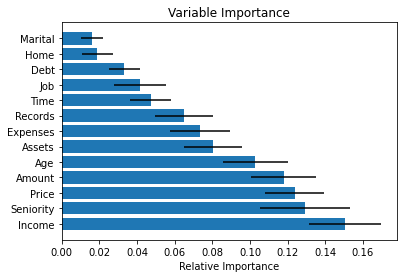

In [24]:
from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier(n_estimators=100) 
clf.fit(X_train, Y_train) 
importances=clf.feature_importances_ 
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0) 
nom_cols = data.columns

sorted_idx = np.argsort(importances)[::-1] 

features = nom_cols
print(features[sorted_idx]) 
 
padding = np.arange(X_train.size/len(X_train)) + 0.5  
plt.barh(padding, importances[sorted_idx],xerr=std[sorted_idx], align='center')  
plt.yticks(padding, features[sorted_idx])  
plt.xlabel("Relative Importance") 
plt.title("Variable Importance")  
plt.show()

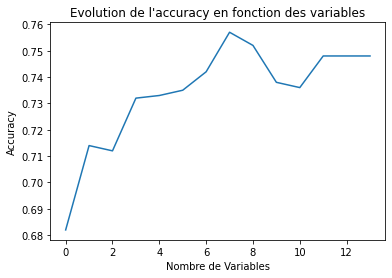

In [25]:
KNN=KNeighborsClassifier(n_neighbors=5) 
scores=np.zeros(X_train.shape[1]+1) 
for f in np.arange(0, X_train.shape[1]+1): 
    X1_f = X_train[:,sorted_idx[:f+1]] 
    X2_f = X_test[:,sorted_idx[:f+1]] 
    KNN.fit(X1_f,Y_train) 
    YKNN=KNN.predict(X2_f) 
    scores[f]=np.round(accuracy_score(Y_test,YKNN),3)  
plt.plot(scores) 
plt.xlabel("Nombre de Variables") 
plt.ylabel("Accuracy") 
plt.title("Evolution de l'accuracy en fonction des variables") 
 
 
plt.show() 

### 6) Paramétrage des classifieurs:

#### Pour l'arbre

In [26]:
#Utilisation de gridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}

#Arbre de décision:
classifier = DecisionTreeClassifier(criterion='gini', random_state=1)
clf = GridSearchCV(classifier,params, verbose=1, cv=3)
clf.fit(X_train,Y_train)




Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [27]:
clf.best_estimator_   #Meilleure combinaison de paramètres

DecisionTreeClassifier(max_leaf_nodes=14, random_state=1)

In [28]:
clf.best_score_ #Score Moyen

0.7590306355738453

In [29]:
clf.best_params_

{'max_leaf_nodes': 14, 'min_samples_split': 2}

#### Pour MLP

In [30]:
params = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
#MLP
classifier = MLPClassifier(hidden_layer_sizes=(40,20), random_state = 1)
clf = GridSearchCV(classifier, params, n_jobs=-1, cv=3)
clf.fit(X_train,Y_train)

GridSearchCV(cv=3,
             estimator=MLPClassifier(hidden_layer_sizes=(40, 20),
                                     random_state=1),
             n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(10, 30, 10), (20,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [31]:
clf.best_estimator_   #Meilleure combinaison de paramètres

MLPClassifier(activation='tanh', hidden_layer_sizes=(10, 30, 10),
              random_state=1)

In [32]:
clf.best_score_ #Score Moyen

0.7892089620484682

In [33]:
clf.best_params_

{'activation': 'tanh',
 'alpha': 0.0001,
 'hidden_layer_sizes': (10, 30, 10),
 'learning_rate': 'constant',
 'solver': 'adam'}

#### Pour KNN

In [34]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

#KNN
classifier = KNeighborsClassifier(n_neighbors = 5)
clf = GridSearchCV(classifier, param_grid, cv=10, scoring='accuracy')
clf.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

In [35]:
clf.best_estimator_   #Meilleure combinaison de paramètres

KNeighborsClassifier(n_neighbors=14)

In [36]:
clf.best_score_ #Score Moyen

0.7663420049432366

In [37]:
clf.best_params_

{'n_neighbors': 14}

### 7) Création d'un pipeline

#### Pour l'arbre

In [38]:
from sklearn.pipeline import Pipeline



TreePipeline= Pipeline(steps=[('norm', StandardScaler()),
                      ('pca', PCA(n_components = 3)),    
                      ('classifier', DecisionTreeClassifier(criterion='gini', random_state=1))])

TreePipeline.fit(X_train,Y_train)

Pipeline(steps=[('norm', StandardScaler()), ('pca', PCA(n_components=3)),
                ('classifier', DecisionTreeClassifier(random_state=1))])

In [39]:
import pickle
with open('model_pickle_TreePipeline','wb') as f:
    pickle.dump(TreePipeline,f)

#### Pour MLP

In [40]:
MLPPipeline= Pipeline(steps=[('norm', StandardScaler()),
                      ('pca', PCA(n_components = 3)),    
                      ('classifier', MLPClassifier(hidden_layer_sizes=(40,20), random_state = 1))])

MLPPipeline.fit(X_train,Y_train)

Pipeline(steps=[('norm', StandardScaler()), ('pca', PCA(n_components=3)),
                ('classifier',
                 MLPClassifier(hidden_layer_sizes=(40, 20), random_state=1))])

In [41]:
import pickle
with open('model_pickle_MLPPipeline','wb') as f:
    pickle.dump(MLPPipeline,f)

#### Pour KNN

In [42]:
KNNPipeline= Pipeline(steps=[('norm', StandardScaler()),
                      ('pca', PCA(n_components = 3)),    
                      ('classifier', KNeighborsClassifier(n_neighbors = 5))])

KNNPipeline.fit(X_train,Y_train)

Pipeline(steps=[('norm', StandardScaler()), ('pca', PCA(n_components=3)),
                ('classifier', KNeighborsClassifier())])

In [43]:
import pickle
with open('model_pickle_KNNPipeline','wb') as f:
    pickle.dump(KNNPipeline,f)

### 8) Comparaison de plusieurs algorithmes d'apprentissage

In [169]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
import time

#Plusieurs Decisions Stump

clfs = { 
   'RF': RandomForestClassifier(n_estimators=50, random_state=1),
   'KNN5': KNeighborsClassifier(n_neighbors=5), 
   'KNN10': KNeighborsClassifier(n_neighbors=10),
   'gnb': GaussianNB(),
   'CART': DecisionTreeClassifier(criterion='gini', random_state=1),
   'id3': tree.DecisionTreeClassifier(criterion='entropy',max_depth=8,splitter='best'),
   'MLP40,20': MLPClassifier(hidden_layer_sizes=(40,20), random_state = 1),
   'MLP20,10': MLPClassifier(hidden_layer_sizes=(20,10), random_state = 1),
   'Random Forest 20': RandomForestClassifier(max_depth=20, random_state=0),
   'Random Forest 50': RandomForestClassifier(max_depth=50, random_state=0),
   'AdaBoost20': AdaBoostClassifier(n_estimators=20, random_state=0),
   'AdaBoost50': AdaBoostClassifier(n_estimators=50, random_state=0),
   'Bagging20': BaggingClassifier(base_estimator=SVC(), n_estimators=20, random_state=0),
   'Bagging50': BaggingClassifier(base_estimator=SVC(), n_estimators=50, random_state=0),
   'Stump':DecisionTreeClassifier(max_depth=1, min_samples_leaf=1),
}

kf = KFold(n_splits=10, shuffle=True, random_state=0)

#Pour 10
for i in clfs:
    clf = clfs[i]
    start_time = time.time()
    cv_acc = cross_val_score(clf, X_train, Y_train, cv=kf)
    cv_roc = cross_val_score(clf, X_train, Y_train, cv=3, scoring='roc_auc')
    cv_recall = cross_val_score(clf, X_train, Y_train, cv=3, scoring='recall')
    cv_precision = cross_val_score(clf, X_train, Y_train, cv=3, scoring='precision')
    end_time = time.time()
    exec_time = end_time - start_time
    print("Accuracy for {0} is: {1:.3f} +/- {2:.3f}".format(i, np.mean(cv_acc), np.std(cv_acc)))
    print("Area for {0} under ROC Curve is: {1:.3f} +/- {2:.3f}".format(i, np.mean(cv_roc), np.std(cv_roc)))
    print("Recall for {0} is: {1:.3f} +/- {2:.3f}".format(i, np.mean(cv_recall), np.std(cv_recall)))
    print("Precision for {0} is: {1:.3f} +/- {2:.3f}".format(i, np.mean(cv_precision), np.std(cv_precision)))
    print("Execution time for {0} is: {1}".format(i,exec_time))
    
    

Accuracy for RF is: nan +/- nan
Area for RF under ROC Curve is: nan +/- nan
Recall for RF is: nan +/- nan
Precision for RF is: nan +/- nan
Execution time for RF is: 0.014011621475219727
Accuracy for KNN5 is: nan +/- nan
Area for KNN5 under ROC Curve is: nan +/- nan
Recall for KNN5 is: nan +/- nan
Precision for KNN5 is: nan +/- nan
Execution time for KNN5 is: 0.010008096694946289
Accuracy for KNN10 is: nan +/- nan
Area for KNN10 under ROC Curve is: nan +/- nan
Recall for KNN10 is: nan +/- nan
Precision for KNN10 is: nan +/- nan
Execution time for KNN10 is: 0.010009288787841797
Accuracy for gnb is: nan +/- nan
Area for gnb under ROC Curve is: nan +/- nan
Recall for gnb is: nan +/- nan
Precision for gnb is: nan +/- nan
Execution time for gnb is: 0.014014005661010742
Accuracy for CART is: nan +/- nan
Area for CART under ROC Curve is: nan +/- nan
Recall for CART is: nan +/- nan
Precision for CART is: nan +/- nan
Execution time for CART is: 0.014010906219482422
Accuracy for id3 is: nan +/- n

In [19]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
import time

#Plusieurs Decisions Stump
def run_classifiers(clfs,X,Y):
    stats = {}
    kf = KFold(n_splits=10, shuffle=True, random_state=0)

    #Pour 10
    for i in clfs:
        clf = clfs[i]
        start_time = time.time()
        cv_acc = cross_val_score(clf, X, Y, cv=kf, error_score='raise')
        cv_roc = cross_val_score(clf, X, Y, cv=3, scoring='roc_auc')
        cv_recall = cross_val_score(clf, X, Y, cv=3, scoring='recall')
        cv_precision = cross_val_score(clf, X, Y, cv=3, scoring='precision')
        end_time = time.time()
        exec_time = end_time - start_time
        print("Accuracy for {0} is: {1:.3f} +/- {2:.3f}".format(i, np.mean(cv_acc), np.std(cv_acc)))
        print("Area for {0} under ROC Curve is: {1:.3f} +/- {2:.3f}".format(i, np.mean(cv_roc), np.std(cv_roc)))
        print("Recall for {0} is: {1:.3f} +/- {2:.3f}".format(i, np.mean(cv_recall), np.std(cv_recall)))
        print("Precision for {0} is: {1:.3f} +/- {2:.3f}".format(i, np.mean(cv_precision), np.std(cv_precision)))
        print("Execution time for {0} is: {1}".format(i,exec_time))
        stats[i]={"Accuracy":cv_acc , "AUC":cv_roc , "Recall":cv_recall, "Precision":cv_precision}
    return stats
    
    

In [111]:
clfs = { 
   'RF': RandomForestClassifier(n_estimators=50, random_state=1),
   'KNN5': KNeighborsClassifier(n_neighbors=5), 
   'KNN10': KNeighborsClassifier(n_neighbors=10),
   'gnb': GaussianNB(),
   'CART': DecisionTreeClassifier(criterion='gini', random_state=1),
   'id3': tree.DecisionTreeClassifier(criterion='entropy',max_depth=8,splitter='best'),
   'MLP40,20': MLPClassifier(hidden_layer_sizes=(40,20), random_state = 1),
   'MLP20,10': MLPClassifier(hidden_layer_sizes=(20,10), random_state = 1),
   'Random Forest 20': RandomForestClassifier(max_depth=20, random_state=0),
   'Random Forest 50': RandomForestClassifier(max_depth=50, random_state=0),
   'AdaBoost20': AdaBoostClassifier(n_estimators=20, random_state=0),
   'AdaBoost50': AdaBoostClassifier(n_estimators=50, random_state=0),
   'Bagging20': BaggingClassifier(base_estimator=SVC(), n_estimators=20, random_state=0),
   'Bagging50': BaggingClassifier(base_estimator=SVC(), n_estimators=50, random_state=0),
   'Stump':DecisionTreeClassifier(max_depth=1, min_samples_leaf=1),
}

run_classifiers(clfs, X_train, Y_train)



Accuracy for RF is: 0.765 +/- 0.018
Area for RF under ROC Curve is: 0.807 +/- 0.018
Recall for RF is: 0.883 +/- 0.009
Precision for RF is: 0.800 +/- 0.005
Execution time for RF is: 1.8036644458770752
Accuracy for KNN5 is: 0.710 +/- 0.039
Area for KNN5 under ROC Curve is: 0.641 +/- 0.006
Recall for KNN5 is: 0.862 +/- 0.026
Precision for KNN5 is: 0.760 +/- 0.002
Execution time for KNN5 is: 0.22666311264038086
Accuracy for KNN10 is: 0.715 +/- 0.030
Area for KNN10 under ROC Curve is: 0.670 +/- 0.012
Recall for KNN10 is: 0.866 +/- 0.025
Precision for KNN10 is: 0.766 +/- 0.000
Execution time for KNN10 is: 0.2352132797241211
Accuracy for gnb is: 0.766 +/- 0.022
Area for gnb under ROC Curve is: 0.781 +/- 0.018
Recall for gnb is: 0.888 +/- 0.024
Precision for gnb is: 0.799 +/- 0.030
Execution time for gnb is: 0.02602386474609375
Accuracy for CART is: 0.706 +/- 0.031
Area for CART under ROC Curve is: 0.650 +/- 0.005
Recall for CART is: 0.801 +/- 0.010
Precision for CART is: 0.804 +/- 0.004
Execu

## II. Apprentissage supervisé : Données hétérogènes

In [132]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [133]:
data = pd.read_csv('./credit.data', sep='\t', header=None)
print(data.head(4))
X = data.values
print("X : ",X)

  0      1     2  3  4  5  6     7  8  9   10 11 12   13   14 15
0  b  30.83  0.00  u  g  w  v  1.25  t  t   1  f  g  202    0  +
1  a  58.67  4.46  u  g  q  h  3.04  t  t   6  f  g   43  560  +
2  a  24.50  0.50  u  g  q  h  1.50  t  f   0  f  g  280  824  +
3  b  27.83  1.54  u  g  w  v  3.75  t  t   5  t  g  100    3  +
X :  [['b' '30.83' 0.0 ... '202' 0 '+']
 ['a' '58.67' 4.46 ... '43' 560 '+']
 ['a' '24.50' 0.5 ... '280' 824 '+']
 ...
 ['a' '25.25' 13.5 ... '200' 1 '-']
 ['b' '17.92' 0.205 ... '280' 750 '-']
 ['b' '35.00' 3.375 ... '0' 0 '-']]


In [62]:
X_split = [[],[]]

for x in X:
    if x[15] == '+' :
        X_split[0].append(x)
    elif x[15] == '-' :
        X_split[1].append(x)
X_split[0]=np.array(X_split[0])
X_split[1]=np.array(X_split[1])
X_split=np.array(X_split)


indexes = [1,2,7,10,13,14] #indices des cathegories numeriques
X2_split = [[],[]]
for i in range(0,2):
    for ligne in X_split[i]:
        X2_split[i].append(np.take(ligne,indexes))

for i in range (0,2):
    for indexLigne in range (0,len(X2_split[i])):
        for index in range (0, len(X2_split[i][indexLigne])):
            if X2_split[i][indexLigne][index] == '?' : 
                X2_split[i][indexLigne][index] = np.nan
            X2_split[i][indexLigne][index] = float(X2_split[i][indexLigne][index])
                

X3_split = [[],[]]

for i in range(0,2):
    for ligne in X2_split[i]:
        if not np.isnan(np.sum(np.array(ligne))):
            tmp = ligne
            lbl = 1-i
            tmp = np.append(tmp,lbl)
            X3_split[i].append(tmp)
            

In [63]:
print("nombre d'exemples positifs, en comptant les nan : ",np.array(X2_split[0]).shape[0])
print("nombre d'exemples positifs, en excluant les nan : ",np.array(X3_split[0]).shape[0])
print("nombre d'exemples negatifs, en comptant les nan : ",np.array(X2_split[1]).shape[0])
print("nombre d'exemples negatifs, en excluant les nan : ",np.array(X3_split[1]).shape[0])
print("nombre d'elements de notre echantillon : ", X.shape[0])
print("nombre d'elements de notre echantillon, sans les nan : ", np.array(X3_split[0]).shape[0] + np.array(X3_split[1]).shape[0])

nombre d'exemples positifs, en comptant les nan :  305
nombre d'exemples positifs, en excluant les nan :  299
nombre d'exemples negatifs, en comptant les nan :  383
nombre d'exemples negatifs, en excluant les nan :  367
nombre d'elements de notre echantillon :  688
nombre d'elements de notre echantillon, sans les nan :  666


In [117]:
inputs = np.append(X3_split[0],X3_split[1],axis= 0)
np.random.shuffle(inputs)
labels = inputs[:,6]
labels = labels.astype('int')
inputs = inputs[:,:6]
print(inputs)
print(labels)

[[28.67 1.04 2.5 5.0 300.0 1430.0]
 [17.67 0.0 0.0 0.0 86.0 0.0]
 [54.33 6.75 2.625 11.0 0.0 284.0]
 [47.42 3.0 13.875 2.0 519.0 1704.0]
 [39.92 6.21 0.04 1.0 200.0 300.0]
 [25.0 12.33 3.5 6.0 400.0 458.0]
 [28.17 0.585 0.04 0.0 260.0 1004.0]
 [37.5 1.125 1.5 0.0 431.0 0.0]
 [38.25 6.0 1.0 0.0 0.0 0.0]
 [18.08 0.375 10.0 0.0 300.0 0.0]
 [31.67 0.83 1.335 8.0 303.0 3290.0]
 [40.33 7.54 8.0 14.0 0.0 2300.0]
 [22.0 0.79 0.29 1.0 420.0 283.0]
 [31.67 16.165 3.0 9.0 250.0 730.0]
 [29.67 1.415 0.75 1.0 240.0 100.0]
 [47.33 6.5 1.0 0.0 0.0 228.0]
 [33.08 4.625 1.625 2.0 0.0 0.0]
 [21.17 0.0 0.5 0.0 0.0 0.0]
 [22.33 11.0 2.0 1.0 80.0 278.0]
 [46.0 4.0 0.0 0.0 100.0 960.0]
 [30.0 5.29 2.25 5.0 99.0 500.0]
 [25.17 6.0 1.0 3.0 0.0 0.0]
 [20.17 8.17 1.96 14.0 60.0 158.0]
 [21.67 11.5 0.0 11.0 0.0 0.0]
 [27.58 3.25 5.085 2.0 369.0 1.0]
 [22.92 3.165 0.165 0.0 160.0 1058.0]
 [33.92 1.585 0.0 0.0 320.0 0.0]
 [22.25 9.0 0.085 0.0 0.0 0.0]
 [23.5 1.5 0.875 0.0 160.0 0.0]
 [16.08 0.75 1.75 5.0 352.0 690

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

clfs = { 
   'RF': RandomForestClassifier(n_estimators=50, random_state=1),
   'KNN5': KNeighborsClassifier(n_neighbors=5), 
   'KNN10': KNeighborsClassifier(n_neighbors=10),
   'gnb': GaussianNB(),
   'CART': DecisionTreeClassifier(criterion='gini', random_state=1),
   'id3': DecisionTreeClassifier(criterion='entropy',max_depth=8,splitter='best'),
   'MLP40,20': MLPClassifier(hidden_layer_sizes=(40,20), random_state = 1),
   'MLP20,10': MLPClassifier(hidden_layer_sizes=(20,10), random_state = 1),
   'Random Forest 20': RandomForestClassifier(max_depth=20, random_state=0),
   'Random Forest 50': RandomForestClassifier(max_depth=50, random_state=0),
   'AdaBoost20': AdaBoostClassifier(n_estimators=20, random_state=0),
   'AdaBoost50': AdaBoostClassifier(n_estimators=50, random_state=0),
   'Bagging20': BaggingClassifier(base_estimator=SVC(), n_estimators=20, random_state=0),
   'Bagging50': BaggingClassifier(base_estimator=SVC(), n_estimators=50, random_state=0),
   'Stump':DecisionTreeClassifier(max_depth=1, min_samples_leaf=1),
}

results = run_classifiers(clfs,inputs,labels)

Accuracy for RF is: 0.788 +/- 0.059
Area for RF under ROC Curve is: 0.833 +/- 0.029
Recall for RF is: 0.662 +/- 0.035
Precision for RF is: 0.766 +/- 0.080
Execution time for RF is: 1.01291823387146
Accuracy for KNN5 is: 0.680 +/- 0.055
Area for KNN5 under ROC Curve is: 0.724 +/- 0.008
Recall for KNN5 is: 0.568 +/- 0.056
Precision for KNN5 is: 0.652 +/- 0.007
Execution time for KNN5 is: 0.06505918502807617
Accuracy for KNN10 is: 0.695 +/- 0.053
Area for KNN10 under ROC Curve is: 0.724 +/- 0.013
Recall for KNN10 is: 0.528 +/- 0.059
Precision for KNN10 is: 0.707 +/- 0.036
Execution time for KNN10 is: 0.06505870819091797
Accuracy for gnb is: 0.718 +/- 0.033
Area for gnb under ROC Curve is: 0.795 +/- 0.006
Recall for gnb is: 0.475 +/- 0.043
Precision for gnb is: 0.819 +/- 0.033
Execution time for gnb is: 0.02202010154724121
Accuracy for CART is: 0.715 +/- 0.052
Area for CART under ROC Curve is: 0.671 +/- 0.019
Recall for CART is: 0.609 +/- 0.025
Precision for CART is: 0.650 +/- 0.022
Execut

In [66]:
print(results)

{'RF': {'Accuracy': array([0.64179104, 0.80597015, 0.7761194 , 0.85074627, 0.8358209 ,
       0.82089552, 0.84848485, 0.77272727, 0.78787879, 0.74242424]), 'AUC': array([0.81054447, 0.81446721, 0.87422131]), 'Recall': array([0.62626263, 0.65      , 0.71      ]), 'Precision': array([0.72941176, 0.69148936, 0.87654321])}, 'KNN5': {'Accuracy': array([0.74626866, 0.73134328, 0.68656716, 0.62686567, 0.64179104,
       0.73134328, 0.72727273, 0.60606061, 0.71212121, 0.59090909]), 'AUC': array([0.71322986, 0.72598361, 0.73172131]), 'Recall': array([0.49494949, 0.63      , 0.58      ]), 'Precision': array([0.66216216, 0.64948454, 0.64444444])}, 'KNN10': {'Accuracy': array([0.73134328, 0.74626866, 0.70149254, 0.67164179, 0.64179104,
       0.71641791, 0.78787879, 0.59090909, 0.6969697 , 0.66666667]), 'AUC': array([0.70546933, 0.7345082 , 0.73081967]), 'Recall': array([0.45454545, 0.6       , 0.53      ]), 'Precision': array([0.68181818, 0.68181818, 0.75714286])}, 'gnb': {'Accuracy': array([0.67

In [67]:
auc = {}
for key in results:
    auc[key] = np.mean(results[key]['AUC'])
print(auc)

{'RF': 0.8330776645570728, 'KNN5': 0.7236449258680366, 'KNN10': 0.7235990654243354, 'gnb': 0.794728978217916, 'CART': 0.6708523863182, 'id3': 0.7045605730771664, 'MLP40,20': 0.7923574251556392, 'MLP20,10': 0.6291188530199593, 'Random Forest 20': 0.8331938178712802, 'Random Forest 50': 0.8331938178712802, 'AdaBoost20': 0.8228380959625129, 'AdaBoost50': 0.8030093551804868, 'Bagging20': 0.6983125156222583, 'Bagging50': 0.6988322089794834, 'Stump': 0.7214602172598975}


In [68]:
print(max(auc,key=auc.get), " : ", auc[max(auc,key=auc.get)])

Random Forest 20  :  0.8331938178712802


In [69]:
from sklearn.preprocessing import StandardScaler
autoscale = StandardScaler()
X_norm = autoscale.fit_transform(inputs)
print(X_norm)

[[-0.22239986 -0.88434144 -0.5776594  -0.49927201  0.22109469 -0.16514194]
 [-0.4952518   1.53990696 -0.30262902 13.10177542 -0.24578832 -0.14244556]
 [-0.18042264 -0.70939568 -0.14119815 -0.49927201  0.10437394 -0.19206984]
 [-1.04095567  0.75714964 -0.44014421  0.92173294 -0.50257398 -0.19206984]
 [ 1.91843843 -0.85934919  0.51947265 -0.49927201 -0.01234681 -0.1316744 ]
 [-1.05522793 -0.60942667  0.0336853  -0.49927201 -0.40919737 -0.19091579]
 [ 0.75650895 -0.65941118 -0.66435376 -0.49927201  0.68797771 -0.19206984]
 [ 0.69354311 -0.85934919 -0.58961724 -0.49927201  0.61794526 -0.19206984]
 [-1.04095567 -0.9593182  -0.66435376 -0.49927201  1.85518524 -0.1918775 ]
 [ 0.43496343  0.06536412  0.83037655 -0.49927201 -1.06283359  0.57729888]
 [-0.85205818 -0.80936469 -0.44014421 -0.49927201 -0.29247662 -0.19168516]
 [-1.02752296  0.94009292 -0.3654077  -0.49927201 -0.71267133 -0.11513297]
 [-0.91502401 -0.35950416 -0.61502766  0.10973011 -0.47922983 -0.19091579]
 [-0.38359239 -0.80936469

In [70]:
results_norm = run_classifiers(clfs,X_norm,labels)

Accuracy for RF is: 0.787 +/- 0.058
Area for RF under ROC Curve is: 0.834 +/- 0.030
Recall for RF is: 0.662 +/- 0.035
Precision for RF is: 0.771 +/- 0.076
Execution time for RF is: 0.9989151954650879
Accuracy for KNN5 is: 0.748 +/- 0.032
Area for KNN5 under ROC Curve is: 0.800 +/- 0.042
Recall for KNN5 is: 0.582 +/- 0.034
Precision for KNN5 is: 0.768 +/- 0.060
Execution time for KNN5 is: 0.06806182861328125
Accuracy for KNN10 is: 0.746 +/- 0.039
Area for KNN10 under ROC Curve is: 0.814 +/- 0.038
Recall for KNN10 is: 0.512 +/- 0.013
Precision for KNN10 is: 0.836 +/- 0.069
Execution time for KNN10 is: 0.07006216049194336
Accuracy for gnb is: 0.718 +/- 0.033
Area for gnb under ROC Curve is: 0.795 +/- 0.006
Recall for gnb is: 0.475 +/- 0.043
Precision for gnb is: 0.819 +/- 0.033
Execution time for gnb is: 0.01901841163635254
Accuracy for CART is: 0.716 +/- 0.052
Area for CART under ROC Curve is: 0.671 +/- 0.019
Recall for CART is: 0.609 +/- 0.025
Precision for CART is: 0.650 +/- 0.022
Exec

In [71]:
auc_norm = {}
for key in results_norm:
    auc_norm[key] = np.mean(results_norm[key]['AUC'])
print(auc_norm)

{'RF': 0.8335147198135338, 'KNN5': 0.8004721500849716, 'KNN10': 0.8142797067480526, 'gnb': 0.7948109454310308, 'CART': 0.6708523863182, 'id3': 0.6971805823125296, 'MLP40,20': 0.8575357354252463, 'MLP20,10': 0.8358811155672411, 'Random Forest 20': 0.8342599335125658, 'Random Forest 50': 0.8342599335125658, 'AdaBoost20': 0.8228380959625129, 'AdaBoost50': 0.8030366775848584, 'Bagging20': 0.8328186839742218, 'Bagging50': 0.8324088995153902, 'Stump': 0.7214602172598975}


In [74]:
print(max(auc_norm,key=auc_norm.get), " : ", auc_norm[max(auc_norm,key=auc_norm.get)])

MLP40,20  :  0.8575357354252463


In [72]:
comparison = {}
for key in auc:
    comparison[key] = [auc[key],auc_norm[key]]
print(comparison)

{'RF': [0.8330776645570728, 0.8335147198135338], 'KNN5': [0.7236449258680366, 0.8004721500849716], 'KNN10': [0.7235990654243354, 0.8142797067480526], 'gnb': [0.794728978217916, 0.7948109454310308], 'CART': [0.6708523863182, 0.6708523863182], 'id3': [0.7045605730771664, 0.6971805823125296], 'MLP40,20': [0.7923574251556392, 0.8575357354252463], 'MLP20,10': [0.6291188530199593, 0.8358811155672411], 'Random Forest 20': [0.8331938178712802, 0.8342599335125658], 'Random Forest 50': [0.8331938178712802, 0.8342599335125658], 'AdaBoost20': [0.8228380959625129, 0.8228380959625129], 'AdaBoost50': [0.8030093551804868, 0.8030366775848584], 'Bagging20': [0.6983125156222583, 0.8328186839742218], 'Bagging50': [0.6988322089794834, 0.8324088995153902], 'Stump': [0.7214602172598975, 0.7214602172598975]}


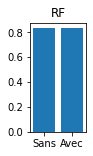

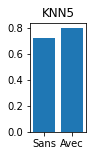

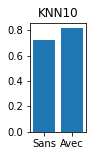

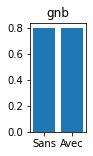

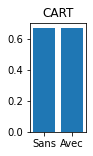

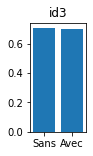

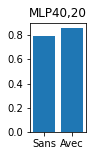

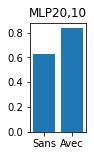

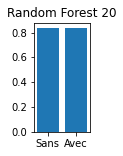

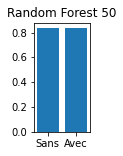

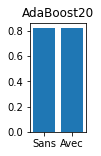

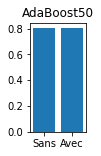

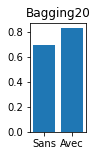

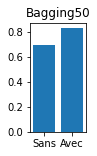

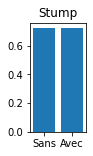

In [80]:
for key in comparison :
    plt.figure(figsize=(1, 2))
    plt.bar(['Sans','Avec'],comparison[key])
    plt.title(key)
    plt.show()

In [108]:
from sklearn.impute import SimpleImputer
indexes = [1,2,7,10,13,14] #indices des cathegories numeriques
col_cat = np.setdiff1d(np.arange(len(X[0])-1),indexes)
print(indexes)
print(col_cat)
X_cat = np.copy(X[:, col_cat])
for col_id in range(len(col_cat)):
    unique_val, val_idx = np.unique(X_cat[:, col_id], return_inverse=True)
    X_cat[:, col_id] = val_idx
imp_cat = SimpleImputer(missing_values=0, strategy='most_frequent')
X_cat[:, range(5)] = imp_cat.fit_transform(X_cat[:, range(5)])
print(X_cat)

[1, 2, 7, 10, 13, 14]
[ 0  3  4  5  6  8  9 11 12]
[[2 2 1 13 8 1 1 0 0]
 [1 2 1 11 4 1 1 0 0]
 [1 2 1 11 4 1 0 0 0]
 [2 2 1 13 8 1 1 1 0]
 [2 2 1 13 8 1 0 0 2]
 [2 2 1 10 8 1 0 1 0]
 [2 2 1 12 4 1 0 1 0]
 [1 2 1 3 8 1 0 0 0]
 [2 3 3 9 4 1 0 0 0]
 [2 3 3 13 8 1 0 1 0]
 [2 2 1 2 4 0 0 1 0]
 [2 2 1 2 4 1 0 0 0]
 [1 2 1 9 8 1 0 1 0]
 [2 2 1 9 8 0 0 0 0]
 [1 2 1 11 8 1 1 1 0]
 [2 3 3 9 8 1 1 1 0]
 [2 2 1 10 8 1 1 1 0]
 [1 2 1 11 8 1 1 0 0]
 [2 2 1 4 4 1 0 1 0]
 [1 2 1 3 4 1 1 0 0]
 [2 2 1 2 8 1 1 0 0]
 [2 2 1 2 8 1 0 0 2]
 [1 2 1 2 8 1 1 1 0]
 [1 2 1 14 4 1 1 0 0]
 [1 2 1 11 8 1 1 1 0]
 [1 2 1 2 4 1 1 0 0]
 [1 2 1 7 1 1 1 1 0]
 [2 2 1 4 1 1 1 1 0]
 [2 2 1 5 4 1 1 0 0]
 [2 2 1 13 8 1 1 1 0]
 [2 2 1 1 8 1 1 1 0]
 [2 2 1 14 4 1 1 0 0]
 [2 2 1 7 1 1 1 1 0]
 [1 2 1 5 8 1 0 1 0]
 [1 2 1 11 8 1 1 1 0]
 [2 2 1 13 8 1 1 1 0]
 [2 2 1 3 4 1 1 1 0]
 [1 2 1 14 4 1 1 1 0]
 [2 3 3 3 8 1 1 0 0]
 [2 2 1 6 3 1 1 1 0]
 [2 2 1 2 8 1 1 1 0]
 [2 2 1 2 4 1 1 0 0]
 [2 2 1 13 4 1 1 0 0]
 [2 2 1 13 8 1 1 1 0]
 [2 3

In [109]:
X_num = np.copy(X[:, indexes])
X_num[X_num == '?'] = np.nan
X_num = X_num.astype(float)
imp_num = SimpleImputer(missing_values=np.nan, strategy='mean')
X_num = imp_num.fit_transform(X_num)
print(X_num)

[[    30.83            0.              1.25            1.
     202.              0.        ]
 [    58.67            4.46            3.04            6.
      43.            560.        ]
 [    24.5             0.5             1.5             0.
     280.            824.        ]
 [    27.83            1.54            3.75            5.
     100.              3.        ]
 [    20.17            5.625           1.71            0.
     120.              0.        ]
 [    32.08            4.              2.5             0.
     360.              0.        ]
 [    33.17            1.04            6.5             0.
     164.          31285.        ]
 [    22.92           11.585           0.04            0.
      80.           1349.        ]
 [    54.42            0.5             3.96            0.
     180.            314.        ]
 [    42.5             4.915           3.165           0.
      52.           1442.        ]
 [    22.08            0.83            2.165           0.
     128.   

In [110]:
from sklearn.preprocessing import OneHotEncoder

X_cat_bin = OneHotEncoder().fit_transform(X_cat).toarray()
print(X_cat_bin.shape)

(688, 40)


In [146]:
labels = np.copy(X[:,15])
for index in range(0,len(labels)):
    if labels[index] == '+':
        labels[index] = 1
    else :
        labels[index] = 0
labels = labels.astype('int')
print(labels)
inputs = np.concatenate((X_num,X_cat_bin),axis=1)
print(X_num.shape)
print(X_cat_bin.shape)
print(inputs)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 

In [147]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

clfs = { 
   'RF': RandomForestClassifier(n_estimators=50, random_state=1),
   'KNN5': KNeighborsClassifier(n_neighbors=5), 
   'KNN10': KNeighborsClassifier(n_neighbors=10),
   'gnb': GaussianNB(),
   'CART': DecisionTreeClassifier(criterion='gini', random_state=1),
   'id3': DecisionTreeClassifier(criterion='entropy',max_depth=8,splitter='best'),
   'MLP40,20': MLPClassifier(hidden_layer_sizes=(40,20), random_state = 1),
   'MLP20,10': MLPClassifier(hidden_layer_sizes=(20,10), random_state = 1),
   'Random Forest 20': RandomForestClassifier(max_depth=20, random_state=0),
   'Random Forest 50': RandomForestClassifier(max_depth=50, random_state=0),
   'AdaBoost20': AdaBoostClassifier(n_estimators=20, random_state=0),
   'AdaBoost50': AdaBoostClassifier(n_estimators=50, random_state=0),
   'Bagging20': BaggingClassifier(base_estimator=SVC(), n_estimators=20, random_state=0),
   'Bagging50': BaggingClassifier(base_estimator=SVC(), n_estimators=50, random_state=0),
   'Stump':DecisionTreeClassifier(max_depth=1, min_samples_leaf=1),
}

results = run_classifiers(clfs,inputs,labels)

Accuracy for RF is: 0.878 +/- 0.029
Area for RF under ROC Curve is: 0.912 +/- 0.043
Recall for RF is: 0.862 +/- 0.053
Precision for RF is: 0.823 +/- 0.124
Execution time for RF is: 0.9864070415496826
Accuracy for KNN5 is: 0.695 +/- 0.053
Area for KNN5 under ROC Curve is: 0.697 +/- 0.042
Recall for KNN5 is: 0.531 +/- 0.040
Precision for KNN5 is: 0.650 +/- 0.054
Execution time for KNN5 is: 0.07406783103942871
Accuracy for KNN10 is: 0.699 +/- 0.037
Area for KNN10 under ROC Curve is: 0.706 +/- 0.049
Recall for KNN10 is: 0.482 +/- 0.061
Precision for KNN10 is: 0.687 +/- 0.083
Execution time for KNN10 is: 0.07306623458862305
Accuracy for gnb is: 0.836 +/- 0.044
Area for gnb under ROC Curve is: 0.897 +/- 0.027
Recall for gnb is: 0.777 +/- 0.068
Precision for gnb is: 0.825 +/- 0.054
Execution time for gnb is: 0.022019624710083008
Accuracy for CART is: 0.814 +/- 0.043
Area for CART under ROC Curve is: 0.775 +/- 0.008
Recall for CART is: 0.761 +/- 0.056
Precision for CART is: 0.748 +/- 0.047
Exe

In [149]:
auc = {}
for key in results:
    auc[key] = np.mean(results[key]['AUC'])
print(auc)
print(max(auc,key=auc.get), " : ", auc[max(auc,key=auc.get)])

{'RF': 0.9123556340479463, 'KNN5': 0.6965287278025799, 'KNN10': 0.7063072407359424, 'gnb': 0.8969915475220519, 'CART': 0.7746612047943447, 'id3': 0.8199183412182407, 'MLP40,20': 0.8129364083134227, 'MLP20,10': 0.808592756783205, 'Random Forest 20': 0.9164819164003014, 'Random Forest 50': 0.9163403899734578, 'AdaBoost20': 0.8947566972747819, 'AdaBoost50': 0.882625337351359, 'Bagging20': 0.696127956864121, 'Bagging50': 0.695411875420694, 'Stump': 0.8635389469644047}
Random Forest 20  :  0.9164819164003014


## III. Apprentissage supervisé sur des données textuelles : Feature engineering et Classification

In [4]:
data = pd.read_csv('./SMSSpamCollection.data', sep='\t', names = ['label','message'])
X = data.values

print("data : ", data)
print("X : ", X)

data :       label                                            message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham               Will ü b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]
X :  [['ham'
  'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...']
 ['ham' 'Ok lar... Joking wif u oni...']
 ['spam'
  "Free entry in 2 a wkly comp to win FA Cu

In [5]:
labels = data['label']
for index in range(0,len(labels)):
    if labels[index] == 'ham':
        labels[index] = 0
    elif labels[index] == 'spam':
        labels[index] = 1
labels = labels.astype('int')
print(labels)

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: label, Length: 5572, dtype: int32


In [6]:
messages = data['message']
print(messages)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: message, Length: 5572, dtype: object


### CountVectorizer

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words=["all","in","the","is","and",""," "])
X_vectors = vectorizer.fit_transform(messages)
print(vectorizer.vocabulary_)

{'go': 3569, 'until': 8079, 'jurong': 4370, 'point': 5954, 'crazy': 2336, 'available': 1314, 'only': 5567, 'bugis': 1765, 'great': 3653, 'world': 8543, 'la': 4497, 'buffet': 1763, 'cine': 2059, 'there': 7689, 'got': 3613, 'amore': 1081, 'wat': 8319, 'ok': 5534, 'lar': 4533, 'joking': 4338, 'wif': 8445, 'oni': 5563, 'free': 3371, 'entry': 2961, 'wkly': 8501, 'comp': 2176, 'to': 7801, 'win': 8458, 'fa': 3098, 'cup': 2396, 'final': 3219, 'tkts': 7788, '21st': 412, 'may': 4955, '2005': 403, 'text': 7640, '87121': 794, 'receive': 6336, 'question': 6228, 'std': 7275, 'txt': 7981, 'rate': 6280, 'apply': 1167, '08452810075over18': 77, 'dun': 2813, 'say': 6675, 'so': 7070, 'early': 2834, 'hor': 3950, 'already': 1053, 'then': 7683, 'nah': 5266, 'don': 2722, 'think': 7704, 'he': 3803, 'goes': 3577, 'usf': 8125, 'lives': 4688, 'around': 1218, 'here': 3854, 'though': 7724, 'freemsg': 3378, 'hey': 3864, 'darling': 2453, 'it': 4241, 'been': 1473, 'week': 8366, 'now': 5449, 'no': 5396, 'word': 8534, '

In [9]:
analyzer = vectorizer.build_analyzer()
#print(analyzer("Le Roi des pirates."))
print(vectorizer.vocabulary_.get('anymore'))

1134


In [10]:
vectorizer.get_feature_names_out()

array(['00', '000', '000pes', '008704050406', '0089', '0121',
       '01223585236', '01223585334', '0125698789', '02', '0207',
       '02072069400', '02073162414', '02085076972', '021', '03', '04',
       '0430', '05', '050703', '0578', '06', '07', '07008009200',
       '07046744435', '07090201529', '07090298926', '07099833605',
       '07123456789', '0721072', '07732584351', '07734396839',
       '07742676969', '07753741225', '0776xxxxxxx', '07781482378',
       '07786200117', '077xxx', '078', '07801543489', '07808',
       '07808247860', '07808726822', '07815296484', '07821230901',
       '078498', '07880867867', '0789xxxxxxx', '07946746291',
       '0796xxxxxx', '07973788240', '07xxxxxxxxx', '08', '0800',
       '08000407165', '08000776320', '08000839402', '08000930705',
       '08000938767', '08001950382', '08002888812', '08002986030',
       '08002986906', '08002988890', '08006344447', '0808', '08081263000',
       '08081560665', '0825', '083', '0844', '08448350055', '08448714184'

In [11]:
print(X_vectors.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [12]:
vectorizer.transform(['Something completely new.']).toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [13]:
bigram_vectorizer = CountVectorizer(ngram_range=(1, 2),stop_words=["all","in","the","is","and",""," "], min_df=5)
bigram_analyzer = bigram_vectorizer.build_analyzer()
print(bigram_analyzer("Le Roi des pirates !"))

['le', 'roi', 'des', 'pirates', 'le roi', 'roi des', 'des pirates']


In [14]:
X_vectors_2 = bigram_vectorizer.fit_transform(messages)
print(bigram_vectorizer.vocabulary_)

{'go': 1166, 'until': 3187, 'point': 2357, 'crazy': 734, 'available': 326, 'only': 2199, 'bugis': 463, 'great': 1214, 'world': 3511, 'la': 1587, 'cine': 628, 'there': 2925, 'got': 1203, 'wat': 3318, 'ok': 2156, 'lar': 1597, 'joking': 1533, 'wif': 3435, 'free': 1062, 'entry': 934, 'wkly': 3488, 'comp': 682, 'to': 3006, 'win': 3455, 'cup': 746, 'final': 1002, 'may': 1790, 'text': 2866, 'receive': 2449, 'question': 2406, 'std': 2768, 'txt': 3153, 'rate': 2419, 'apply': 258, 'free entry': 1067, 'to win': 3083, 'to receive': 3065, 'std txt': 2769, 'txt rate': 3158, 'rate apply': 2420, 'dun': 891, 'say': 2540, 'so': 2681, 'early': 900, 'already': 209, 'then': 2917, 'so early': 2687, 'nah': 2001, 'don': 854, 'think': 2945, 'he': 1301, 'goes': 1177, 'usf': 3236, 'around': 278, 'here': 1330, 'though': 2978, 'don think': 859, 'freemsg': 1075, 'hey': 1331, 'darling': 765, 'it': 1480, 'been': 392, 'week': 3356, 'now': 2086, 'no': 2040, 'word': 3504, 'back': 349, 'like': 1649, 'some': 2711, 'fun': 

In [15]:
print(X_vectors_2.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [260]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

clfs = { 
   'RF': RandomForestClassifier(n_estimators=50, random_state=1),
   'KNN5': KNeighborsClassifier(n_neighbors=5), 
   'KNN10': KNeighborsClassifier(n_neighbors=10),
   'gnb': GaussianNB(),
   'CART': DecisionTreeClassifier(criterion='gini', random_state=1),
   'id3': DecisionTreeClassifier(criterion='entropy',max_depth=8,splitter='best'),
   'MLP40,20': MLPClassifier(hidden_layer_sizes=(40,20), random_state = 1),
   'MLP20,10': MLPClassifier(hidden_layer_sizes=(20,10), random_state = 1),
   'Random Forest 20': RandomForestClassifier(max_depth=20, random_state=0),
   'Random Forest 50': RandomForestClassifier(max_depth=50, random_state=0),
   'AdaBoost20': AdaBoostClassifier(n_estimators=20, random_state=0),
   'AdaBoost50': AdaBoostClassifier(n_estimators=50, random_state=0),
   'Bagging20': BaggingClassifier(base_estimator=SVC(), n_estimators=20, random_state=0),
   'Bagging50': BaggingClassifier(base_estimator=SVC(), n_estimators=50, random_state=0),
   'Stump':DecisionTreeClassifier(max_depth=1, min_samples_leaf=1),
}

results = run_classifiers(clfs,X_vectors.toarray(),labels)

Accuracy for RF is: 0.977 +/- 0.006
Area for RF under ROC Curve is: 0.989 +/- 0.004
Recall for RF is: 0.807 +/- 0.014
Precision for RF is: 0.997 +/- 0.005
Execution time for RF is: 174.96600914001465
Accuracy for KNN5 is: 0.920 +/- 0.013
Area for KNN5 under ROC Curve is: 0.820 +/- 0.014
Recall for KNN5 is: 0.344 +/- 0.027
Precision for KNN5 is: 1.000 +/- 0.000
Execution time for KNN5 is: 16.92284893989563
Accuracy for KNN10 is: 0.895 +/- 0.016
Area for KNN10 under ROC Curve is: 0.828 +/- 0.008
Recall for KNN10 is: 0.158 +/- 0.015
Precision for KNN10 is: 1.000 +/- 0.000
Execution time for KNN10 is: 16.907349348068237
Accuracy for gnb is: 0.900 +/- 0.016
Area for gnb under ROC Curve is: 0.902 +/- 0.012
Recall for gnb is: 0.900 +/- 0.023
Precision for gnb is: 0.591 +/- 0.013
Execution time for gnb is: 20.063619136810303
Accuracy for CART is: 0.972 +/- 0.006
Area for CART under ROC Curve is: 0.909 +/- 0.009
Recall for CART is: 0.838 +/- 0.020
Precision for CART is: 0.870 +/- 0.021
Executio

KeyboardInterrupt: 

### Tf–idf term weighting

In [18]:
from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer(smooth_idf=True)
tfidf = transformer.fit_transform(X_vectors.toarray())
print(tfidf)

  (0, 8543)	0.22210786875471422
  (0, 8319)	0.1834657865889847
  (0, 8079)	0.23134609168566542
  (0, 7689)	0.15641404979064522
  (0, 5954)	0.25682591877627564
  (0, 5567)	0.1569305869106269
  (0, 4497)	0.2773971825910565
  (0, 4370)	0.32835683677227684
  (0, 3653)	0.18138449755019256
  (0, 3613)	0.15393493392372168
  (0, 3569)	0.14872791471728733
  (0, 2336)	0.2542897670248509
  (0, 2059)	0.2773971825910565
  (0, 1765)	0.2773971825910565
  (0, 1763)	0.3134520933994109
  (0, 1314)	0.24560020532689875
  (0, 1081)	0.32835683677227684
  (1, 8445)	0.43162957585464123
  (1, 5563)	0.5466243141314314
  (1, 5534)	0.2718944069420321
  (1, 4533)	0.4083258549263009
  (1, 4338)	0.5236804332035243
  (2, 8501)	0.18743908134282486
  (2, 8458)	0.145315117414387
  (2, 7981)	0.12230242418326867
  :	:
  (5570, 8115)	0.21268928087461395
  (5570, 7801)	0.0851287624472701
  (5570, 7095)	0.20916013699923128
  (5570, 7085)	0.18769220306866097
  (5570, 5363)	0.21394080334188428
  (5570, 4638)	0.1624534183627614

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

clfs = { 
   'RF': RandomForestClassifier(n_estimators=50, random_state=1),
   'KNN5': KNeighborsClassifier(n_neighbors=5), 
   'KNN10': KNeighborsClassifier(n_neighbors=10),
   'gnb': GaussianNB(),
   'CART': DecisionTreeClassifier(criterion='gini', random_state=1),
   'id3': DecisionTreeClassifier(criterion='entropy',max_depth=8,splitter='best'),
   'MLP40,20': MLPClassifier(hidden_layer_sizes=(40,20), random_state = 1),
   'MLP20,10': MLPClassifier(hidden_layer_sizes=(20,10), random_state = 1),
   'Random Forest 20': RandomForestClassifier(max_depth=20, random_state=0),
   'Random Forest 50': RandomForestClassifier(max_depth=50, random_state=0),
   'AdaBoost20': AdaBoostClassifier(n_estimators=20, random_state=0),
   'AdaBoost50': AdaBoostClassifier(n_estimators=50, random_state=0),
   'Bagging20': BaggingClassifier(base_estimator=SVC(), n_estimators=20, random_state=0),
   'Bagging50': BaggingClassifier(base_estimator=SVC(), n_estimators=50, random_state=0),
   'Stump':DecisionTreeClassifier(max_depth=1, min_samples_leaf=1),
}

results = run_classifiers(clfs,tfidf.toarray(),labels)

Accuracy for RF is: 0.977 +/- 0.004
Area for RF under ROC Curve is: 0.990 +/- 0.003
Recall for RF is: 0.805 +/- 0.022
Precision for RF is: 0.997 +/- 0.005
Execution time for RF is: 167.59866094589233
Accuracy for KNN5 is: 0.915 +/- 0.023
Area for KNN5 under ROC Curve is: 0.941 +/- 0.018
Recall for KNN5 is: 0.442 +/- 0.251
Precision for KNN5 is: 0.997 +/- 0.005
Execution time for KNN5 is: 14.372496604919434
Accuracy for KNN10 is: 0.946 +/- 0.014
Area for KNN10 under ROC Curve is: 0.974 +/- 0.004
Recall for KNN10 is: 0.606 +/- 0.099
Precision for KNN10 is: 0.994 +/- 0.004
Execution time for KNN10 is: 14.150336503982544
Accuracy for gnb is: 0.897 +/- 0.016
Area for gnb under ROC Curve is: 0.891 +/- 0.009
Recall for gnb is: 0.878 +/- 0.017
Precision for gnb is: 0.587 +/- 0.010
Execution time for gnb is: 17.246178150177002
Accuracy for CART is: 0.970 +/- 0.006
Area for CART under ROC Curve is: 0.917 +/- 0.002
Recall for CART is: 0.851 +/- 0.007
Precision for CART is: 0.880 +/- 0.015
Executi

KeyboardInterrupt: 

### Truncated SVD

In [21]:
from sklearn.decomposition import TruncatedSVD

tsvd = TruncatedSVD(n_components=100)
X_tsvd = tsvd.fit_transform(tfidf)
print(X_tsvd)

[[ 0.05392859  0.00285519  0.0244308  ... -0.03292323 -0.01272505
   0.04797298]
 [ 0.03321418  0.09790059  0.23617501 ... -0.01945422  0.0297924
   0.00343405]
 [ 0.08515852 -0.00121949  0.00163618 ...  0.00645063 -0.00661353
   0.00860291]
 ...
 [ 0.09397158 -0.01230786  0.01083439 ... -0.00766153  0.00800298
   0.01854906]
 [ 0.15082635 -0.0025277   0.02922531 ...  0.00936738  0.0093954
   0.05646841]
 [ 0.08298583 -0.01127043  0.02269423 ... -0.05289882  0.01730003
   0.00775069]]


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

clfs = { 
   'RF': RandomForestClassifier(n_estimators=50, random_state=1),
   'KNN5': KNeighborsClassifier(n_neighbors=5), 
   'KNN10': KNeighborsClassifier(n_neighbors=10),
   'gnb': GaussianNB(),
   'CART': DecisionTreeClassifier(criterion='gini', random_state=1),
   'id3': DecisionTreeClassifier(criterion='entropy',max_depth=8,splitter='best'),
   'MLP40,20': MLPClassifier(hidden_layer_sizes=(40,20), random_state = 1),
   'MLP20,10': MLPClassifier(hidden_layer_sizes=(20,10), random_state = 1),
   'Random Forest 20': RandomForestClassifier(max_depth=20, random_state=0),
   'Random Forest 50': RandomForestClassifier(max_depth=50, random_state=0),
   'AdaBoost20': AdaBoostClassifier(n_estimators=20, random_state=0),
   'AdaBoost50': AdaBoostClassifier(n_estimators=50, random_state=0),
   'Bagging20': BaggingClassifier(base_estimator=SVC(), n_estimators=20, random_state=0),
   'Bagging50': BaggingClassifier(base_estimator=SVC(), n_estimators=50, random_state=0),
   'Stump':DecisionTreeClassifier(max_depth=1, min_samples_leaf=1),
}

results = run_classifiers(clfs,X_tsvd,labels)

Accuracy for RF is: 0.974 +/- 0.006
Area for RF under ROC Curve is: 0.975 +/- 0.007
Recall for RF is: 0.810 +/- 0.022
Precision for RF is: 0.981 +/- 0.015
Execution time for RF is: 17.944411516189575
Accuracy for KNN5 is: 0.969 +/- 0.006
Area for KNN5 under ROC Curve is: 0.959 +/- 0.006
Recall for KNN5 is: 0.797 +/- 0.030
Precision for KNN5 is: 0.948 +/- 0.015
Execution time for KNN5 is: 2.2083849906921387
Accuracy for KNN10 is: 0.962 +/- 0.009
Area for KNN10 under ROC Curve is: 0.968 +/- 0.003
Recall for KNN10 is: 0.724 +/- 0.013
Precision for KNN10 is: 0.975 +/- 0.010
Execution time for KNN10 is: 2.2327356338500977
Accuracy for gnb is: 0.836 +/- 0.014
Area for gnb under ROC Curve is: 0.931 +/- 0.002
Recall for gnb is: 0.870 +/- 0.020
Precision for gnb is: 0.442 +/- 0.020
Execution time for gnb is: 0.19717860221862793
Accuracy for CART is: 0.957 +/- 0.011
Area for CART under ROC Curve is: 0.905 +/- 0.007
Recall for CART is: 0.847 +/- 0.006
Precision for CART is: 0.781 +/- 0.038
Execut